# Ersin ÇEBİ
# 217SE2407D

# Problem

In this project we will examine Istanbul’s curent subway system, and will chack if can it sustain the growing population of Istanbul

# Data Explanation

In the project, there is two seperate data
    - One containes Istanbul's population growth in yearly basis, Dataset has two columns;
        - One is year column, it is between 2000 to 2019
        - Other is change of population respect to every year
    
    - Other dataset is Istanbul subways yearly reached capacity, there is 13 colums;
        - First column shows year, it is between 1989 to 2018
        - The other colums are named with the subways systems codes, like m1, m2, etc...

# Questions, Hypothesis

For the examine and observe the data I run some tests, before running tests I made a hypothesis, and it is in five years the current subway system will not gonna able to sustain the passenger capacity.

# Code Part

In [1]:
# required libraries for project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def clusters(datasets, column):
    kmns = pd.DataFrame(datasets, columns=['population',column])
    kmeans = KMeans(n_clusters=5).fit(kmns)
    return kmns, kmeans

In [3]:
# dataset importation
population = pd.read_excel('./datasets/istanbul_yillara_gore_nufus_artisi.xlsx')
subwaysystem = pd.read_excel('./datasets/rayli-sistemler-hat-bazli-yolculuk-saylari.xlsx')

In [4]:
# population data lined horizantal,
# for making it vertical, I transposed the data
#then, user pandas 'columns' method to relabel columns
population = population.T
population = population.reset_index()
population.columns = ['year', 'population']

In [5]:
population

,year,population
0,2000,11076840
1,2001,11292009
2,2002,11495948
3,2003,11699172
4,2004,11910733
5,2005,12128577
6,2006,12351506
7,2007,12573836
8,2008,12697164
9,2009,12915158


In [6]:
# there was only one column name Turkish on this dataset,
# so replaced it with English translation
# just for make the usage more easy for my self, I lowercased other column labels 
subwaysystem.rename(columns={'Yıl':'year'},inplace=True)
subwaysystem.columns = map(str.lower, subwaysystem.columns)

In [7]:
subwaysystem.fillna(0, inplace=True)
subwaysystem

,year,m1,m2,m3,m4,m5,m6,t1,t3,t4,f1,tf1,tf2
0,1989,993742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1990,11659369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1991,15336734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1992,17991036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993,14068062,0.0,0.0,0.0,0.0,0.0,26321795.0,0.0,0.0,0.0,0.0,0.0
5,1994,23336883,0.0,0.0,0.0,0.0,0.0,43365960.0,0.0,0.0,0.0,0.0,0.0
6,1995,34042320,0.0,0.0,0.0,0.0,0.0,43306662.0,0.0,0.0,0.0,0.0,0.0
7,1996,45400191,0.0,0.0,0.0,0.0,0.0,45216110.0,0.0,0.0,0.0,0.0,0.0
8,1997,54099681,0.0,0.0,0.0,0.0,0.0,47286431.0,0.0,0.0,0.0,0.0,0.0
9,1998,56906437,0.0,0.0,0.0,0.0,0.0,46789016.0,0.0,0.0,0.0,0.0,0.0


In [8]:
population.describe()

,year,population
count,20.00000,2.000000e+01
mean,2009.50000,1.322454e+07
std,5.91608,1.402611e+06
min,2000.00000,1.107684e+07
25%,2004.75000,1.207412e+07
50%,2009.50000,1.308542e+07
75%,2014.25000,1.444712e+07
max,2019.00000,1.551927e+07


In [9]:
subwaysystem.describe()

,year,m1,m2,m3,m4,m5,m6,t1,t3,t4,f1,tf1,tf2
count,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,3.000000e+01,3.000000e+01,30.000000,3.000000e+01
mean,2003.500000,6.708934e+07,4.684734e+07,3.442476e+06,1.681276e+07,1.118383e+06,6.893597e+05,6.596919e+07,60985.200000,1.380873e+07,3.521475e+06,247629.033333,4.887093e+05
std,8.803408,4.199656e+07,4.970307e+07,7.617856e+06,3.417363e+07,5.891443e+06,1.819109e+06,4.157974e+07,233076.799349,1.917485e+07,4.469344e+06,214012.675684,5.703066e+05
min,1989.000000,9.937420e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1996.250000,4.729091e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.332149e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
50%,2003.500000,6.074539e+07,4.117341e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.823642e+07,0.000000,0.000000e+00,0.000000e+00,289984.500000,0.000000e+00
75%,2010.750000,7.726672e+07,7.258293e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.029114e+08,0.000000,3.101294e+07,7.937546e+06,446423.000000,1.068186e+06
max,2018.000000,1.559430e+08,1.507051e+08,2.319353e+07,1.018228e+08,3.228761e+07,5.875247e+06,1.324949e+08,996501.000000,5.320080e+07,1.200144e+07,580800.000000,1.519071e+06


In [10]:
subwaysystem.shape

(30, 13)

In [11]:
population.shape

(20, 2)

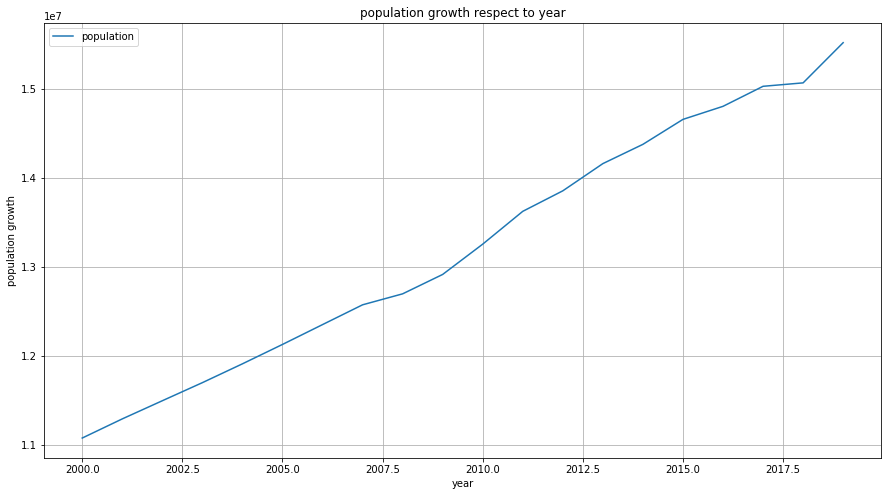

In [12]:
population.set_index('year').plot(figsize=(15,8), grid=True)
plt.ylabel('population growth')
plt.xlabel('year')
plt.title('population growth respect to year')
plt.show()

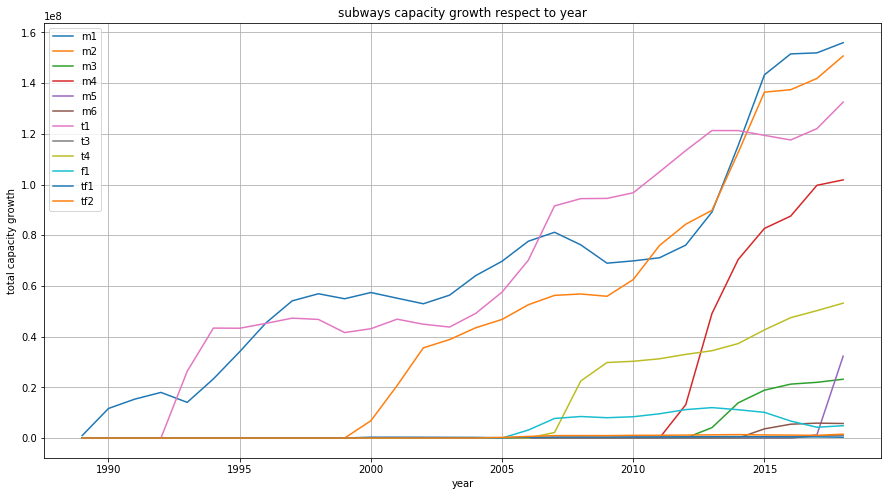

In [13]:
subwaysystem.set_index('year').plot(figsize=(15,8), grid=True)
plt.ylabel('total capacity growth')
plt.xlabel('year')
plt.title('subways capacity growth respect to year')
plt.show()

In [14]:
# population data covers limited era
# so thats why I chose to take intersection of data with merge
mergedDataset = pd.merge(subwaysystem, population, how='inner')
mergedDataset

,year,m1,m2,m3,m4,m5,m6,t1,t3,t4,f1,tf1,tf2,population
0,2000,57398597,6812038.0,0.0,0.0,0.0,0.0,43116562.0,0.0,0.0,0.0,323060.0,0.0,11076840
1,2001,55161090,20687387.0,0.0,0.0,0.0,0.0,46879441.0,0.0,0.0,0.0,326404.0,0.0,11292009
2,2002,52963072,35581375.0,0.0,0.0,0.0,0.0,44891357.0,0.0,0.0,0.0,307361.0,0.0,11495948
3,2003,56355945,38836858.0,0.0,0.0,0.0,0.0,43781365.0,0.0,0.0,0.0,269810.0,0.0,11699172
4,2004,64092187,43509956.0,0.0,0.0,0.0,0.0,49186407.0,0.0,0.0,0.0,248535.0,0.0,11910733
5,2005,69731999,46786372.0,0.0,0.0,0.0,0.0,57563183.0,0.0,0.0,0.0,109120.0,254614.0,12128577
6,2006,77622397,52576758.0,0.0,0.0,0.0,0.0,70125847.0,0.0,0.0,3142783.0,272608.0,636085.0,12351506
7,2007,81158613,56274283.0,0.0,0.0,0.0,0.0,91557585.0,0.0,2174309.0,7714405.0,409058.0,954469.0,12573836
8,2008,76199671,56822745.0,0.0,0.0,0.0,0.0,94431877.0,0.0,22495214.0,8490029.0,415187.0,968769.0,12697164
9,2009,68973291,55910179.0,0.0,0.0,0.0,0.0,94516246.0,0.0,29791150.0,8011926.0,406822.0,949252.0,12915158


In [15]:
mergedDataset.shape

(19, 14)

# By using Linear and Polynomial Regression,
We try to estimate a population projection for next decate in Istanbul

In [16]:
X = mergedDataset['year'].values.reshape(-1,1)
y = mergedDataset['population'].values.reshape(-1,1)

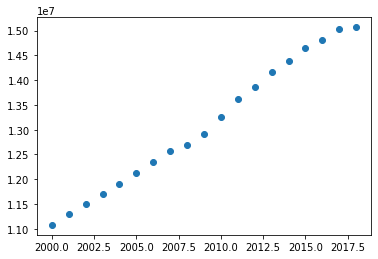

In [17]:
plt.plot(X,y,'o')

Here, we split data into train and test parts

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

Here, we set our range to prediction range we desired to see.
- Our data starts at 2001 and ends at 2018,
- For this project, it is decided as 10 year range, after data end

In [19]:
pred_range = np.arange(min(X_test)[0],max(X_test)[0]+10,1)
pred_range

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027], dtype=int64)

# Population Projection

In [20]:
linreg = LinearRegression()
poly = PolynomialFeatures(degree=2)

In [21]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(linreg.intercept_)
print(linreg.coef_)

[-4.64717107e+08]
[[237862.44186047]]


In [23]:
max(X_test)[0]

2018

In [24]:
y_pred_linreg = linreg.predict(pred_range.reshape(-1, 1))
y_pred_linreg.shape

(27, 1)

In [25]:
X_ = poly.fit_transform(X_train)
predict_ = poly.fit_transform(pred_range.reshape(-1, 1))

linreg.fit(X_, y_train)
y_pred_poly = linreg.predict(predict_)

In [26]:
# prediction results
pd.DataFrame({'year': pred_range
              ,'Predicted w/ Linear': y_pred_linreg.flatten()
              ,'Predicted w/ Polynomial': y_pred_poly.flatten()})

,year,Predicted w/ Linear,Predicted w/ Polynomial
0,2001,1.124564e+07,1.126953e+07
1,2002,1.148350e+07,1.149191e+07
2,2003,1.172136e+07,1.171653e+07
3,2004,1.195923e+07,1.194337e+07
4,2005,1.219709e+07,1.217243e+07
5,2006,1.243495e+07,1.240373e+07
6,2007,1.267281e+07,1.263725e+07
7,2008,1.291068e+07,1.287299e+07
8,2009,1.314854e+07,1.311097e+07
9,2010,1.338640e+07,1.335117e+07


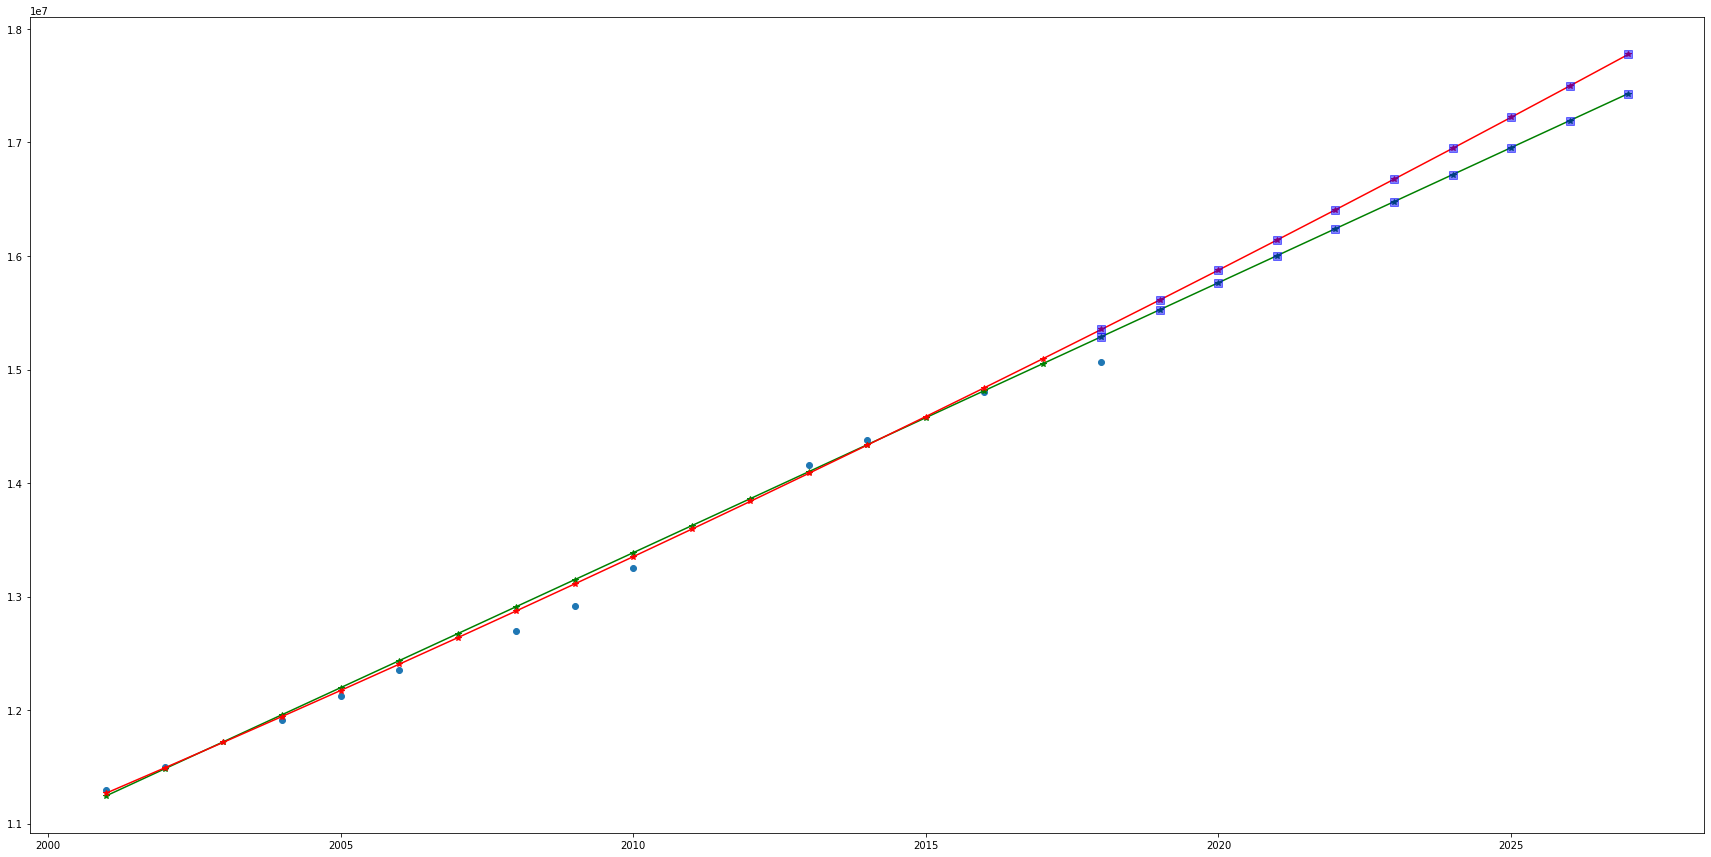

In [27]:
plt.figure(figsize=(30,15))
plt.scatter(X_test, y_test)
# linear regresion, population projection
plt.plot(pred_range, y_pred_linreg, 'g-*')
# marked the prediction part to make it more observable on the plot
plt.plot(pred_range[-10:],y_pred_linreg[-10:],'bs', markersize=8, alpha=0.5)

# polinomial regresion, population projection
plt.plot(pred_range, y_pred_poly, 'g-*', color='red')
plt.plot(pred_range[-10:],y_pred_poly[-10:], 'bs', markersize=8, alpha=0.5)

# By using Linear and Polynomial Regression,
We try to estimate for each subway line projection for next decate in Istanbul

In [28]:
subwayGrowths = []

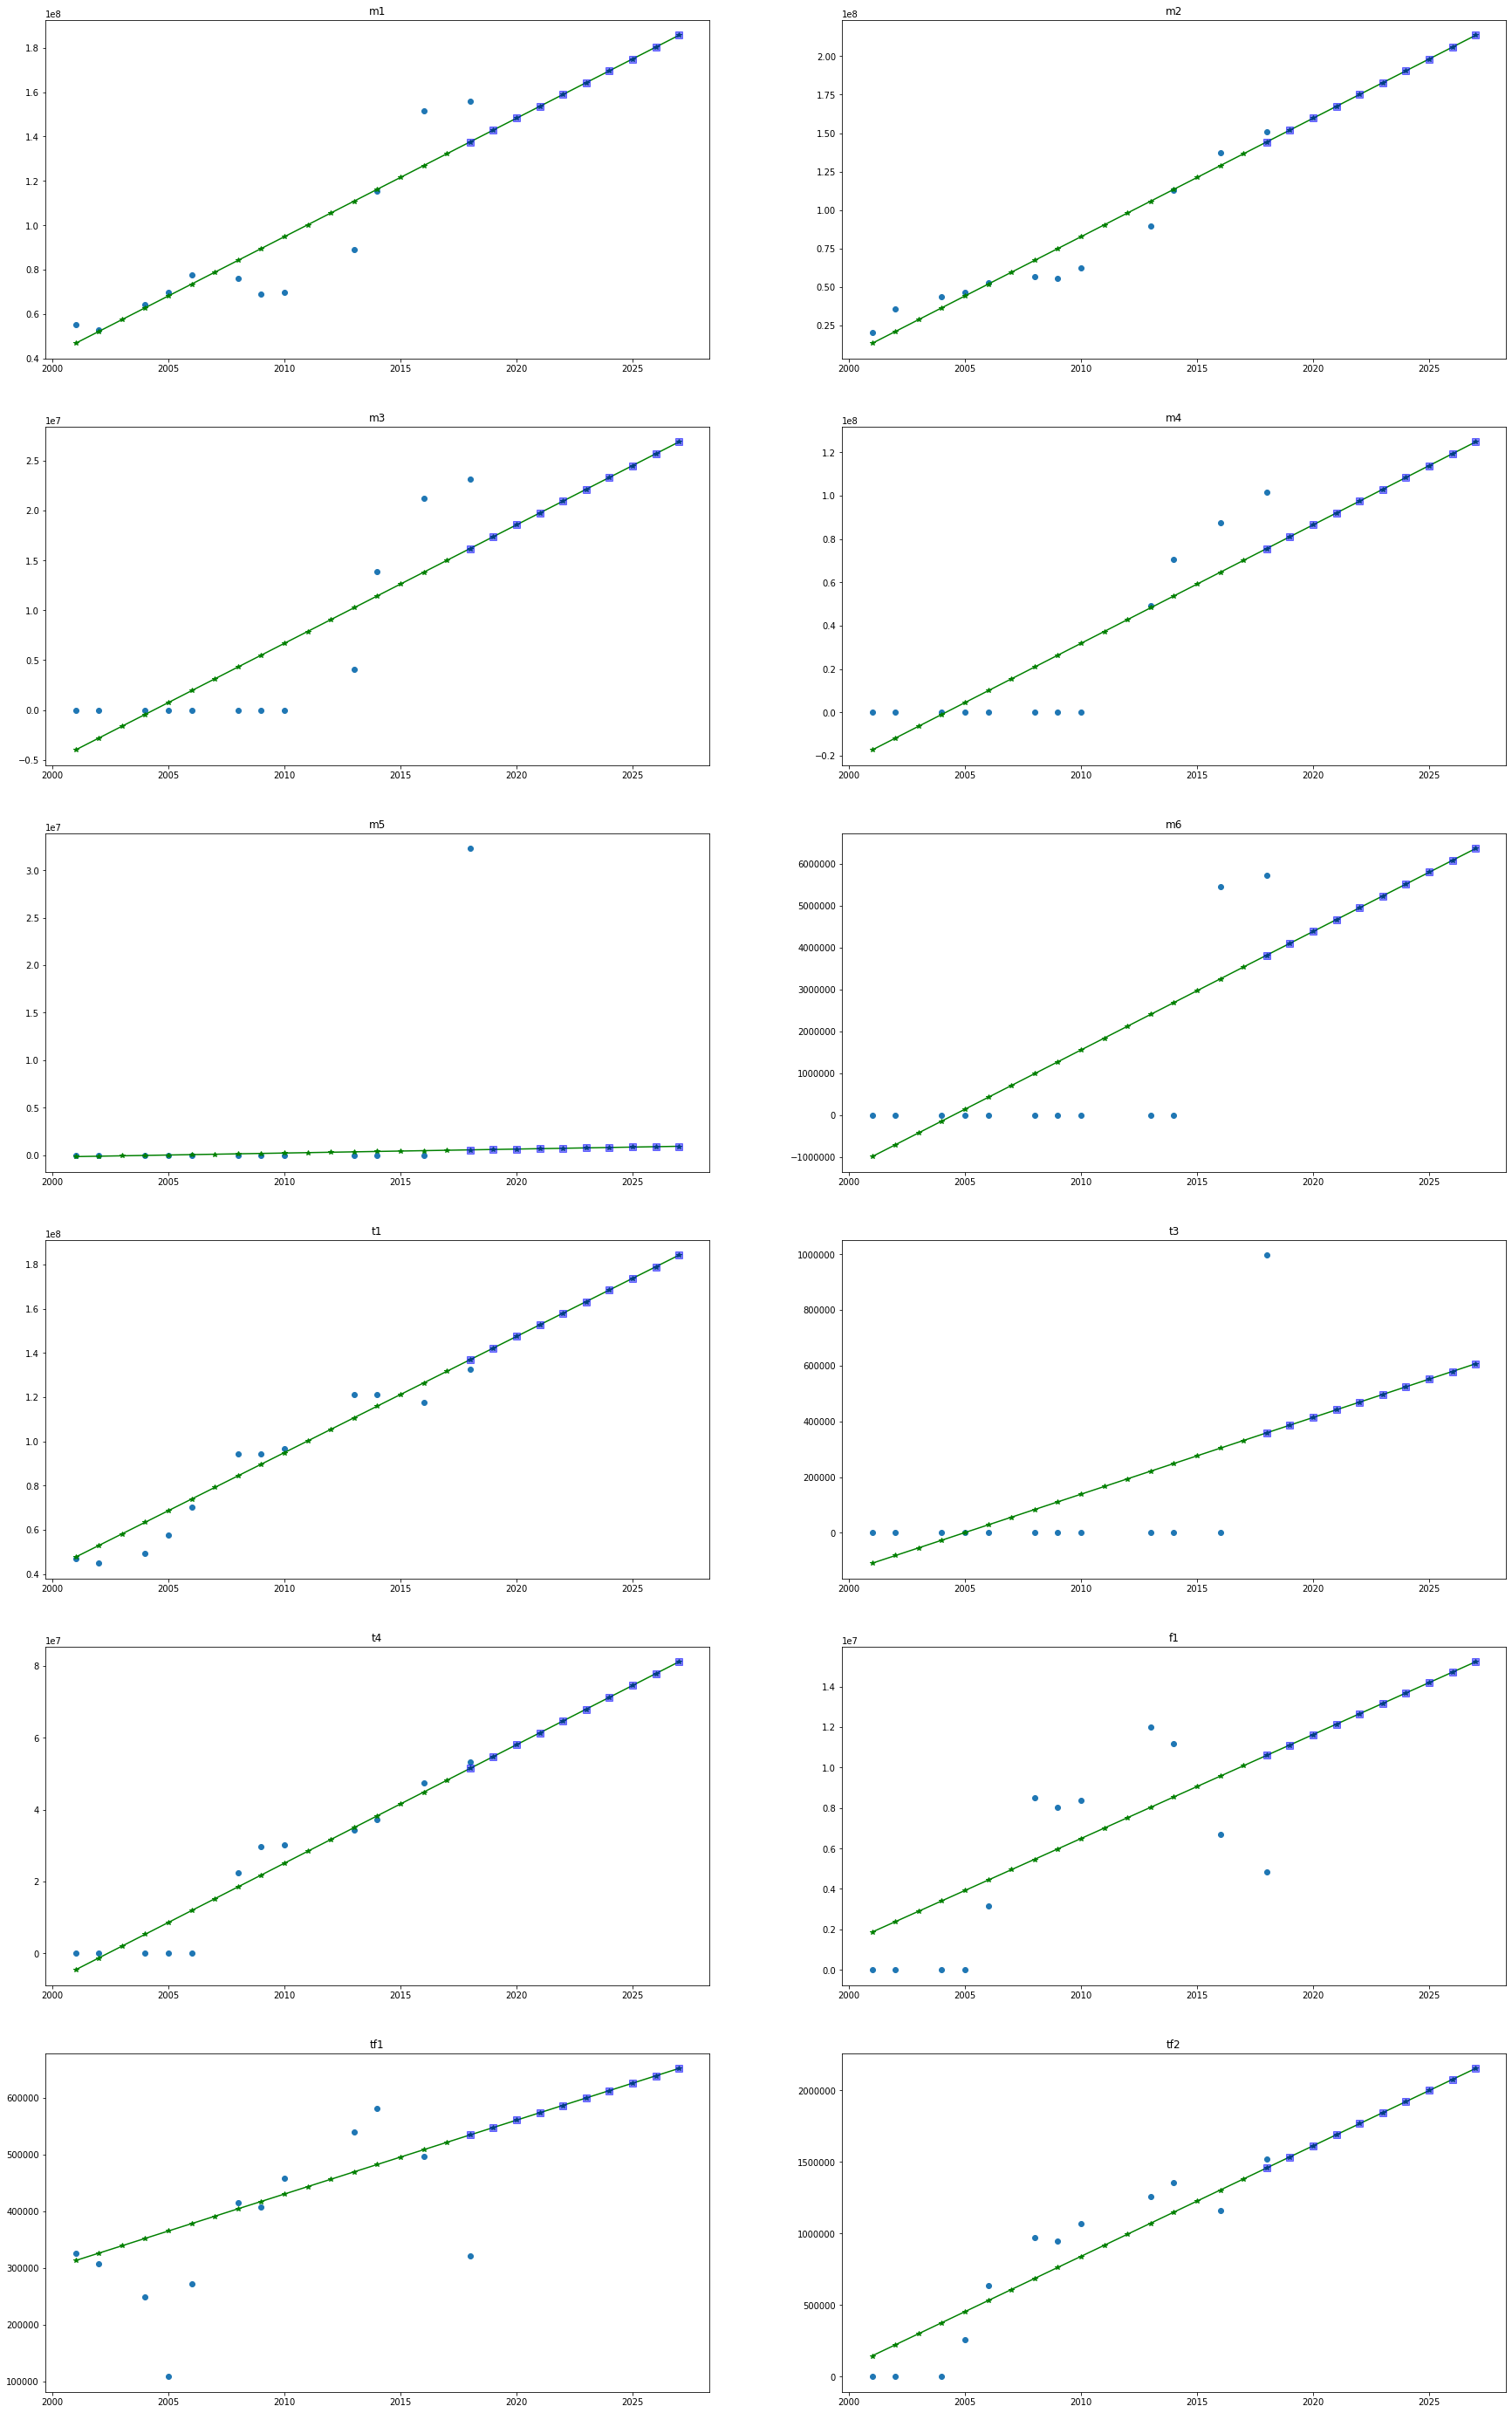

In [29]:
plt.figure(figsize=(30,50))
for i in range(12):
    # selecting data by subway line
    colName = mergedDataset.columns[1:-1][i]
    
    # seperating data as X, y respect to year
    X = mergedDataset['year'].values.reshape(-1,1)
    y = mergedDataset[colName].values.reshape(-1,1)
    
    # spliting data into train and test for projection
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(pred_range.reshape(-1, 1))
    
    # recording every prediction into 
    subwayGrowths.append(y_pred.reshape(1,-1))
    
    plt.subplot(6, 2, i+1)
    
    plt.scatter(X_test, y_test)
    # linear regresion, population projection
    plt.plot(pred_range, y_pred, 'g-*')
    # marked the prediction part to make it more observable on the plot
    plt.plot(pred_range[-10:],y_pred[-10:],'bs', markersize=8, alpha=0.5)
    
    plt.title(colName)

# Kmeans

In [30]:
def calculate_distances(X, centers):
    n = centers.shape[0]
    X_dist = np.zeros(shape=(X.shape[0],n))
    for i in range(n):
        X_dist[:,i] = np.sqrt(np.sum((X - centers[i])**2,1))
    
    return X_dist

In [31]:
def assign_labels(distances):
    labels = np.argmin(distances,axis=1)
    #label is the index of the closest distance
    return labels

In [32]:
X, y = train_test_split(mergedDataset.loc[:, 'm1':'tf2'].values, test_size=0.6, random_state=0)

In [33]:
n_clusters = X.shape[0]
n_clusters

7

In [34]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 1, 3, 4, 2, 5, 6])

In [35]:
X

array([[8.11586130e+07, 5.62742830e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.15575850e+07, 0.00000000e+00,
        2.17430900e+06, 7.71440500e+06, 4.09058000e+05, 9.54469000e+05],
       [1.51922515e+08, 1.41839489e+08, 2.19706130e+07, 9.96871030e+07,
        1.26387600e+06, 5.87524700e+06, 1.22030659e+08, 8.33055000e+05,
        5.02493300e+07, 4.25575800e+06, 4.56835000e+05, 1.06594900e+06],
       [7.11059300e+07, 7.59412650e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.04967109e+08, 0.00000000e+00,
        3.12591970e+07, 9.56265600e+06, 4.62327000e+05, 1.07876700e+06],
       [5.63559450e+07, 3.88368580e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.37813650e+07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.69810000e+05, 0.00000000e+00],
       [5.73985970e+07, 6.81203800e+06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.31165620e+07, 0.00

In [36]:
# 1. Randomly choose clustering
rng = np.random.RandomState(2)
i = rng.permutation(X.shape[0])[:n_clusters]
centers = X[i]
max_ite = 10
while True or i<max_ite:
    # 2a. Assign labels based on closest center
    labels = pairwise_distances_argmin(X, centers)

    # 2b. Find new centers from means of points
    new_centers = np.array([X[labels == i].mean(0)
                                   for i in range(n_clusters)])

    # 2c. Check for convergence
    if np.all(centers == new_centers):
        break

    centers = new_centers
print(centers, labels)

[[5.73985970e+07 6.81203800e+06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.31165620e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.23060000e+05 0.00000000e+00]
 [1.51922515e+08 1.41839489e+08 2.19706130e+07 9.96871030e+07
  1.26387600e+06 5.87524700e+06 1.22030659e+08 8.33055000e+05
  5.02493300e+07 4.25575800e+06 4.56835000e+05 1.06594900e+06]
 [5.63559450e+07 3.88368580e+07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.37813650e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.69810000e+05 0.00000000e+00]
 [7.11059300e+07 7.59412650e+07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.04967109e+08 0.00000000e+00
  3.12591970e+07 9.56265600e+06 4.62327000e+05 1.07876700e+06]
 [7.60904550e+07 8.43379040e+07 0.00000000e+00 1.31274950e+07
  0.00000000e+00 0.00000000e+00 1.13386402e+08 0.00000000e+00
  3.29951800e+07 1.12089760e+07 5.03968000e+05 1.17592600e+06]
 [1.43265115e+08 1.36433243e+08 1.88742690e+07 8.26789630e+07
  0

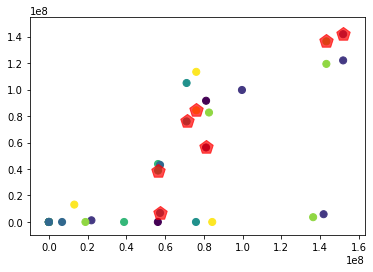

In [37]:
plt.scatter(X[:, 0], X[:, 6], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(X[:, 1], X[:, 5], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(X[:, 2], X[:, 4], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(X[:, 3], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='p')

# KNeighborsClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(mergedDataset.loc[:, 'm1':'tf2'].values, mergedDataset.loc[:, 'year'], test_size=0.6, random_state=0)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_train

7     2007
17    2017
11    2011
3     2003
0     2000
15    2015
12    2012
Name: year, dtype: int64

In [40]:
X_train

array([[8.11586130e+07, 5.62742830e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.15575850e+07, 0.00000000e+00,
        2.17430900e+06, 7.71440500e+06, 4.09058000e+05, 9.54469000e+05],
       [1.51922515e+08, 1.41839489e+08, 2.19706130e+07, 9.96871030e+07,
        1.26387600e+06, 5.87524700e+06, 1.22030659e+08, 8.33055000e+05,
        5.02493300e+07, 4.25575800e+06, 4.56835000e+05, 1.06594900e+06],
       [7.11059300e+07, 7.59412650e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.04967109e+08, 0.00000000e+00,
        3.12591970e+07, 9.56265600e+06, 4.62327000e+05, 1.07876700e+06],
       [5.63559450e+07, 3.88368580e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.37813650e+07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.69810000e+05, 0.00000000e+00],
       [5.73985970e+07, 6.81203800e+06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.31165620e+07, 0.00

Text(0.5, 1.0, 'training data')

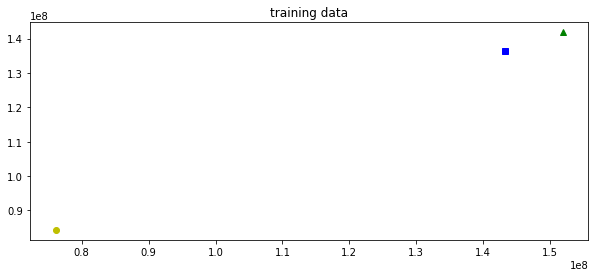

In [41]:
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train==2017, 0], X_train[y_train==2017, 1], "g^", label="Iris-Virginica")
plt.plot(X_train[y_train==2015, 0], X_train[y_train==2015, 1], "bs", label="Iris-Versicolor")
plt.plot(X_train[y_train==2012, 0], X_train[y_train==2012, 1], "yo", label="Iris-Setosa")
plt.title('training data')

In [42]:
ypred = knn.predict(X_train)
print("pred",ypred)
yprob = knn.predict_proba(X_train)
print("prob",yprob)

pred [2000 2007 2000 2000 2000 2007 2003]
prob [[0.2 0.2 0.2 0.2 0.2 0.  0. ]
 [0.  0.  0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.  0. ]
 [0.  0.  0.2 0.2 0.2 0.2 0.2]
 [0.  0.2 0.2 0.2 0.2 0.2 0. ]]


In [43]:
rep = classification_report(y_train,ypred)
print(rep)
# Training is done with out any flaw, but looks like the other datas are not trained at all 

              precision    recall  f1-score   support

        2000       0.25      1.00      0.40         1
        2003       0.00      0.00      0.00         1
        2007       0.00      0.00      0.00         1
        2011       0.00      0.00      0.00         1
        2012       0.00      0.00      0.00         1
        2015       0.00      0.00      0.00         1
        2017       0.00      0.00      0.00         1

    accuracy                           0.14         7
   macro avg       0.04      0.14      0.06         7
weighted avg       0.04      0.14      0.06         7



C:\Users\kakun\.conda\envs\win\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]


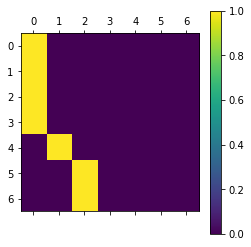

In [44]:
print(confusion_matrix(y_train,ypred))
plt.matshow(confusion_matrix(y_train,ypred))
plt.colorbar()
# As we can see the results, in the confusion matrix was significantly confused,
#    I beleive it because there the data need tuning 

In [45]:
ypred

array([2000, 2007, 2000, 2000, 2000, 2007, 2003], dtype=int64)

In [46]:
y_train

7     2007
17    2017
11    2011
3     2003
0     2000
15    2015
12    2012
Name: year, dtype: int64

In [47]:
# indices of mistakes
print(np.nonzero(ypred!=y_train.values))
print(X_train[np.nonzero(ypred!=y_train.values)])

# indices of mistakes of only label 1
print(np.nonzero(np.logical_and(ypred!=y_train.values,y_train.values==1)))

(array([0, 1, 2, 3, 5, 6], dtype=int64),)
[[8.11586130e+07 5.62742830e+07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 9.15575850e+07 0.00000000e+00
  2.17430900e+06 7.71440500e+06 4.09058000e+05 9.54469000e+05]
 [1.51922515e+08 1.41839489e+08 2.19706130e+07 9.96871030e+07
  1.26387600e+06 5.87524700e+06 1.22030659e+08 8.33055000e+05
  5.02493300e+07 4.25575800e+06 4.56835000e+05 1.06594900e+06]
 [7.11059300e+07 7.59412650e+07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.04967109e+08 0.00000000e+00
  3.12591970e+07 9.56265600e+06 4.62327000e+05 1.07876700e+06]
 [5.63559450e+07 3.88368580e+07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.37813650e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.69810000e+05 0.00000000e+00]
 [1.43265115e+08 1.36433243e+08 1.88742690e+07 8.26789630e+07
  0.00000000e+00 3.61983000e+06 1.19387651e+08 0.00000000e+00
  4.26539630e+07 1.01348090e+07 5.22139000e+05 1.21832400e+06]
 [7.60904550e+07 8.4337

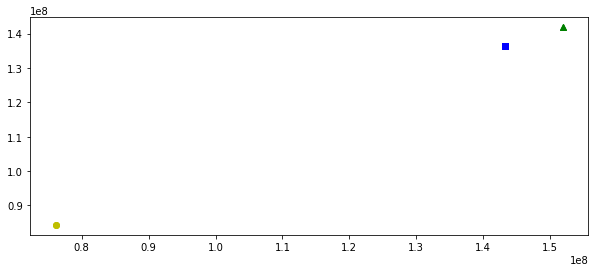

In [48]:
from numpy import logical_and as land
plt.figure(figsize=(10, 4))

plt.plot(X_train[y_train==2017, 0], X_train[y_train==2017, 1], "g^", label="Iris-Virginica")
plt.plot(X_train[y_train==2015, 0], X_train[y_train==2015, 1], "bs", label="Iris-Versicolor")
plt.plot(X_train[y_train==2012, 0], X_train[y_train==2012, 1], "yo", label="Iris-Setosa")
incorrect_ix = ypred!=y_train
i_ix_0 = land(incorrect_ix, y_train==2017)
i_ix_1 = land(incorrect_ix,y_train==2015)
i_ix_2 = land(incorrect_ix,y_train==2012)

# plot the mistakes with transparent larger squares.
plt.plot(X_train[y_train==2017, 0], X_train[y_train==2017, 1], "g^", label="Iris-Virginica")
plt.plot(X_train[y_train==2015, 0], X_train[y_train==2015, 1], "bs", label="Iris-Versicolor")
plt.plot(X_train[y_train==2012, 0], X_train[y_train==2012, 1], "yo", label="Iris-Setosa")


In [49]:
X_train.shape[1]

12

# Results

- The Knn and Kmeans wasn't promising for me, but the Linear and polinomial datas was more convenient and explanative for me.
- For my projections I can clearly say that with the growing population and if we only consider public transportation with the subway systems, my hypotesis is right. 

In [50]:
# prediction results
pd.DataFrame({'year': pred_range
              ,'Predicted w/ Linear': y_pred_linreg.flatten()
              ,'Predicted w/ Polynomial': y_pred_poly.flatten()
              ,'M1': subwayGrowths[0].flatten()
              ,'M2': subwayGrowths[1].flatten()
              ,'M3': subwayGrowths[2].flatten()
              ,'M4': subwayGrowths[3].flatten()
              ,'M5': subwayGrowths[4].flatten()
              ,'M6': subwayGrowths[5].flatten()
              ,'T1': subwayGrowths[6].flatten()
              ,'T3': subwayGrowths[7].flatten()
              ,'T4': subwayGrowths[8].flatten()
              ,'F1': subwayGrowths[9].flatten()
              ,'TF1': subwayGrowths[10].flatten()
              ,'TF2': subwayGrowths[11].flatten()})


,year,Predicted w/ Linear,Predicted w/ Polynomial,M1,M2,M3,M4,M5,M6,T1,T3,T4,F1,TF1,TF2
0,2001,1.124564e+07,1.126953e+07,4.680312e+07,1.342804e+07,-4.009418e+06,-1.740385e+07,-165525.987760,-9.865644e+05,4.764120e+07,-109102.674419,-4.554028e+06,1.868303e+06,313209.915545,1.442791e+05
1,2002,1.148350e+07,1.149191e+07,5.214235e+07,2.112595e+07,-2.821301e+06,-1.193281e+07,-123757.747858,-7.037880e+05,5.289532e+07,-81572.093023,-1.257301e+06,2.382070e+06,326222.460220,2.215805e+05
2,2003,1.172136e+07,1.171653e+07,5.748158e+07,2.882386e+07,-1.633183e+06,-6.461762e+06,-81989.507956,-4.210117e+05,5.814944e+07,-54041.511628,2.039426e+06,2.895837e+06,339235.004896,2.988819e+05
3,2004,1.195923e+07,1.194337e+07,6.282081e+07,3.652177e+07,-4.450661e+05,-9.907193e+05,-40221.268054,-1.382354e+05,6.340356e+07,-26510.930233,5.336153e+06,3.409604e+06,352247.549572,3.761833e+05
4,2005,1.219709e+07,1.217243e+07,6.816004e+07,4.421968e+07,7.430513e+05,4.480324e+06,1546.971848,1.445410e+05,6.865768e+07,1019.651163,8.632881e+06,3.923371e+06,365260.094247,4.534847e+05
5,2006,1.243495e+07,1.240373e+07,7.349927e+07,5.191759e+07,1.931169e+06,9.951367e+06,43315.211750,4.273173e+05,7.391180e+07,28550.232558,1.192961e+07,4.437138e+06,378272.638923,5.307861e+05
6,2007,1.267281e+07,1.263725e+07,7.883850e+07,5.961550e+07,3.119286e+06,1.542241e+07,85083.451652,7.100937e+05,7.916592e+07,56080.813953,1.522633e+07,4.950905e+06,391285.183599,6.080875e+05
7,2008,1.291068e+07,1.287299e+07,8.417773e+07,6.731341e+07,4.307404e+06,2.089345e+07,126851.691554,9.928700e+05,8.442004e+07,83611.395349,1.852306e+07,5.464672e+06,404297.728274,6.853889e+05
8,2009,1.314854e+07,1.311097e+07,8.951696e+07,7.501132e+07,5.495521e+06,2.636450e+07,168619.931457,1.275646e+06,8.967416e+07,111141.976744,2.181979e+07,5.978439e+06,417310.272950,7.626903e+05
9,2010,1.338640e+07,1.335117e+07,9.485619e+07,8.270923e+07,6.683638e+06,3.183554e+07,210388.171359,1.558423e+06,9.492828e+07,138672.558140,2.511652e+07,6.492206e+06,430322.817625,8.399917e+05
